<a href="https://colab.research.google.com/github/aneeq-shaffy/DL-labsheets/blob/main/Lab02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

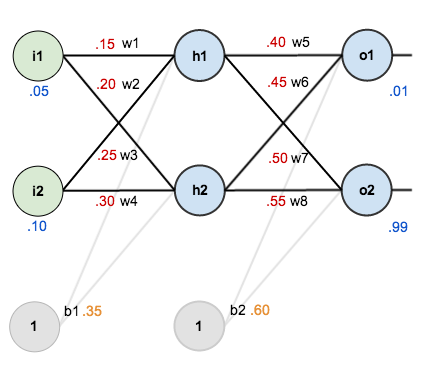

In [8]:
from IPython.display import Image
Image("image.png")

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(100)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

W1 = [[0.1826 0.2304]
 [0.2705 0.3217]] 

 W2 = [[-1.819  -1.769 ]
 [ 1.1239  1.1739]] 

 Output = [[0.178  0.8771]] 
 Desired output = [[0.01 0.99]] 
 Error = 0.020492276763740064


In [11]:
import numpy as np
np.set_printoptions(precision=4)

def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(10000)
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))

main()

W1 = [[0.3061 0.3517]
 [0.4129 0.4677]] 

 W2 = [[-3.9426 -3.8926]
 [ 2.8963  2.9463]] 

 Output = [[0.0162 0.9839]] 
 Desired output = [[0.01 0.99]] 
 Error = 3.792325126541209e-05


## Conclusion:

Based on the comparison of the model's performance with 100 and 10,000 epochs, we can conclude that increasing the number of training iterations (epochs) generally leads to a reduction in the error. As the model is trained for more epochs, it has more opportunities to adjust its weights and biases to better fit the training data, thus minimizing the difference between the predicted output and the desired output.

However, it's crucial to be mindful of the potential for **overfitting**. While a lower error on the training data is desirable, a model that is overfitted might not generalize well to new, unseen data. Visualizing the error over epochs can help us identify the point where the model starts to overfit, as the error on a separate validation set might start to increase even if the training error continues to decrease.

## Visualizing the Error over Epochs:

To further illustrate the effect of the number of epochs on the error, we can plot the error calculated during each epoch. This will show us how the error decreases over time as the model learns. Since the current code only prints the final error, we need to modify the `main` function to store the error at each iteration and then plot it.

In [12]:
def initialize():
    X = np.array([[0.05, 0.10]])      # Inputs
    W1 = np.array([[0.15,0.20], [0.25,0.30]])      # Weights to calculate outputs for hidden layer 1
    b1 = 0.35      # Bias for hidden layer 1
    W2 = np.array([[0.40,0.45], [0.50,0.55]])     # Weights to calculate outputs for output layer
    b2 = 0.60      # Bias for output layer
    Y = np.array([[0.01, 0.99]])      # Desired output
    learning_rate = 0.5
    no_of_iter = int(10000) # Use a higher number of iterations for a clearer plot
    return (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter)

def forward_pass (X, W1, b1, W2, b2, Y):
    ### Forward pass: Calculate hidden layer 1 (there is only 1 hidden layer in this example)
    Z1 = np.dot(X,W1.T) + b1      # WtX + b
    A1 = 1/(1 + np.exp(-Z1))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Forward pass: Calculate output layer
    Z2 = np.dot(A1,W2.T) + b2      # WtX + b
    A2 = 1/(1 + np.exp(-Z2))       # Sigmoid(z) = 1 / (1 + e^(-z))
    ### Calculate error/cost function
    E = np.sum(1/2*np.square(Y - A2))      # squared error function
    return (A1, A2, E)

def back_propagation(X, W1, W2, Y, A1, A2, learning_rate):
    ### Back propogation
    ### Adjust W2
    dEdA2 = A2 - Y
    dA2dZ2 = np.multiply (A2,1-A2)
    dZ2dW2 = A1
    dEdW2 = dEdA2 * dA2dZ2 * dZ2dW2
    W2_adj = W2 - learning_rate * dEdW2.T
    W2 = W2_adj
    ### Adjust W1
    dZ2dA1 = W2.T
    dA1dZ1 = np.multiply(A1,1-A1)
    dZ1dW1 = X
    dEdW1 = dEdA2 * dA2dZ2 * dZ2dA1 * dA1dZ1 * dZ1dW1
    W1_adj = W1 - learning_rate * dEdW1.T
    W1 = W1_adj
    return (W1, W2)

def main_with_error_tracking():
    (X, W1, b1, W2, b2, Y, learning_rate, no_of_iter) = initialize()
    errors = []  # List to store errors at each iteration
    for iter in range (0,no_of_iter):
        (A1, A2, E) = forward_pass(X, W1, b1, W2, b2, Y)
        (W1, W2) = back_propagation(X, W1, W2, Y, A1, A2, learning_rate)
        errors.append(E) # Append the error to the list
    print ('W1 = {} \n\n W2 = {} \n\n Output = {} \n Desired output = {} \n Error = {}'.format(W1, W2, A2, Y, E))
    return errors # Return the list of errors

errors = main_with_error_tracking()

W1 = [[0.3061 0.3517]
 [0.4129 0.4677]] 

 W2 = [[-3.9426 -3.8926]
 [ 2.8963  2.9463]] 

 Output = [[0.0162 0.9839]] 
 Desired output = [[0.01 0.99]] 
 Error = 3.792325126541209e-05


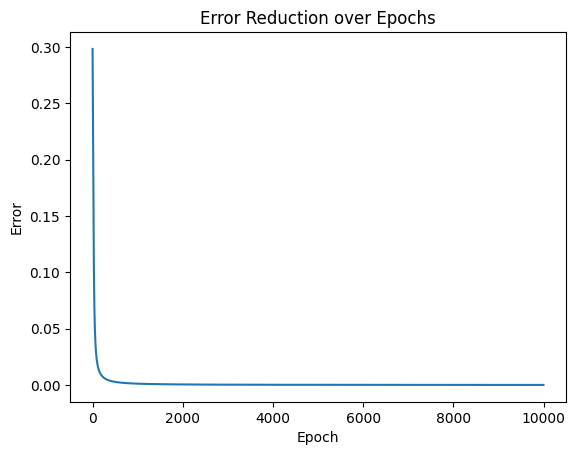

In [13]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Error Reduction over Epochs")
plt.show()